# Colunas sem valor

In [329]:
from sklearn.cluster import DBSCAN
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import category_encoders as category_encoders
from matplotlib import gridspec
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# META 1

In [330]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [332]:
data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [333]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [334]:
print('Original: ', data.shape)
original_rows = len(data)
print('Number of rows: ', original_rows)

Original:  (5110, 12)
Number of rows:  5110


In [335]:
data.dropna(inplace=True)
after_discard_rows = len(data)
print('Number of rows after discard: ', after_discard_rows)

Number of rows after discard:  4909


In [336]:
# Se eliminarmos as colunas sem valor, o dataset continua a ser aceitavel?
def getPercDiscardedData(original, after_discard):
    diff = original - after_discard
    return (diff * 100) / original

print('% of discarded values: ', getPercDiscardedData(original_rows,after_discard_rows).__round__(2))

% of discarded values:  3.93


# Instancias Repetidas

In [337]:
duplicated_data = data.duplicated().any()
duplicated_data

False

# Fix aos titulos de cada coluna

In [338]:
data.columns = [col.capitalize() for col in data]
data

Id  Gender   Age  Hypertension  Heart_disease Ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          Work_type Residence_type  Avg_glucose_level   Bmi   Smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      Stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4909 rows x 12 columns]

# Standarizar valores 

In [339]:
# Todos os valores de strings têm de ser em undercase
data = data.applymap(lambda s: s.lower() if type(s) == str else s)

# Converter a idade de float para int
data[['Age']] = data[['Age']].astype('int')
data

Id  Gender  Age  Hypertension  Heart_disease Ever_married  \
0      9046    male   67             0              1          yes   
2     31112    male   80             0              1          yes   
3     60182  female   49             0              0          yes   
4      1665  female   79             1              0          yes   
5     56669    male   81             0              0          yes   
...     ...     ...  ...           ...            ...          ...   
5104  14180  female   13             0              0           no   
5106  44873  female   81             0              0          yes   
5107  19723  female   35             0              0          yes   
5108  37544    male   51             0              0          yes   
5109  44679  female   44             0              0          yes   

          Work_type Residence_type  Avg_glucose_level   Bmi   Smoking_status  \
0           private          urban             228.69  36.6  formerly smoked   
2           private          rural             105.92  32.5     never smoked   
3           private          urban             171.23  34.4           smokes   
4     self-employed          rural             174.12  24.0     never smoked   
5           private          urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          rural             103.08  18.6          unknown   
5106  self-employed          urban             125.20  40.0     never smoked   
5107  self-employed          rural              82.99  30.6     never smoked   
5108        private          rural             166.29  25.6  formerly smoked   
5109       govt_job          urban              85.28  26.2          unknown   

      Stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4909 rows x 12 columns]

# Remover coluna ID

In [340]:
#Remover coluna id pois não serve para correlacionar
data = data.drop('Id', axis=1)

# Remover Smoking unknown

In [341]:
# Dado que temos valores no qual o valor de Smoking é desconhecido, 
#temos de remover esses valores, dado que danificam a correlação entre um paciente fumar e ter um aneurisma

In [342]:
print (data['Smoking_status'].to_string)

<bound method Series.to_string of 0       formerly smoked
2          never smoked
3                smokes
4          never smoked
5       formerly smoked
             ...       
5104            unknown
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            unknown
Name: Smoking_status, Length: 4909, dtype: object>


In [343]:
data = data[data['Smoking_status'] != 'unknown']
data = data.reset_index(drop=True)
print('Number of rows after discard: ', len(data))

Number of rows after discard:  3426


In [344]:
print('% of discarded values: ', getPercDiscardedData(original_rows,len(data)).__round__(2))

% of discarded values:  32.95


# Remover Gender Other

In [345]:

data = data[data['Gender'] != 'other']
print('Number of rows after discard: ', len(data))
data = data.reset_index(drop=True)
print('% of discarded values: ', getPercDiscardedData(original_rows,len(data)).__round__(2))


Number of rows after discard:  3425
% of discarded values:  32.97


# Visualisação Inicial

Number of rows after discard:  3425


<Axes: ylabel='Heart_disease'>

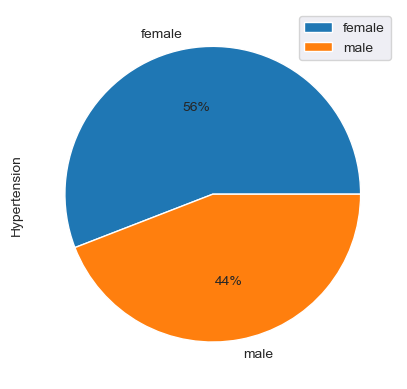

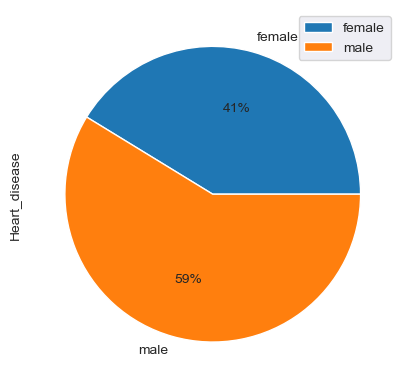

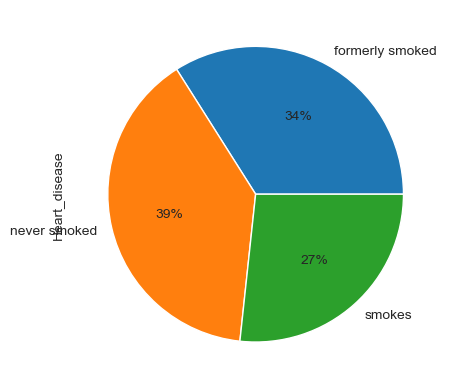

In [346]:
#hipertenção por genero
data = data[data['Gender'] != 'other']
print('Number of rows after discard: ', len(data))
data = data.reset_index(drop=True)
data.groupby(['Gender']).sum().plot( 
    kind='pie', y='Hypertension', autopct='%1.0f%%') 
#sexo por doenças de coração
data.groupby(['Gender']).sum().plot( 
    kind='pie', y='Heart_disease', autopct='%1.0f%%') 
#smoking por doenças de coração
data.groupby(['Smoking_status']).sum().plot( 
    kind='pie', y='Heart_disease', autopct='%1.0f%%',legend=False) 
#heart desiese por bmi



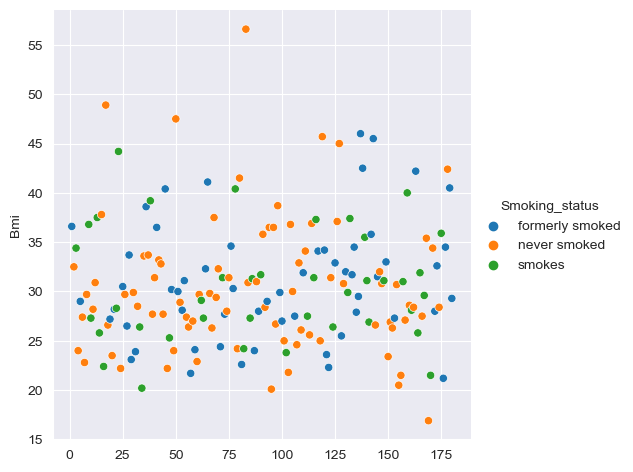

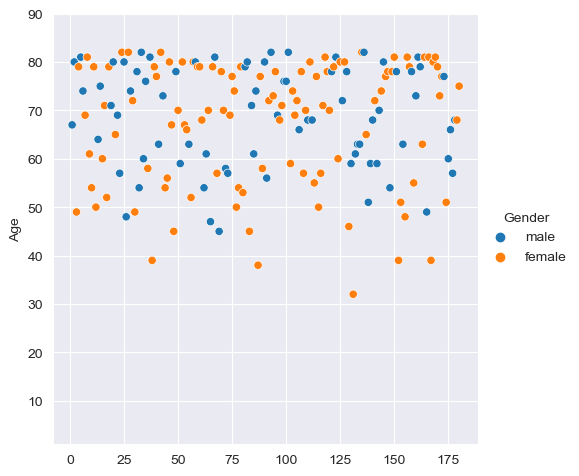

In [347]:
#Isolar as instancias que têm Stroke = 1
stroke_instances = data[data['Stroke'] == 1]

#stroke_instances
sns.relplot(data=stroke_instances, x=range(1,stroke_instances.shape[0] + 1), y='Bmi', hue='Smoking_status')
sns.relplot(data=stroke_instances, x=range(1,stroke_instances.shape[0] + 1), y='Age', hue='Gender')
plt.ylim(1,90)
plt.show()
#sns.relplot(kind='scatter',data=a,x='Age', y="Stroke", hue="Gender")


# Encoding

In [348]:
# Aplicar o encoder à feature "Smoking_status" 
# Atribuir a cada status um numero com uma ordem

ordinal_encoder_smoking = OrdinalEncoder(mapping=[{
       'col': 'Smoking_status',
       'mapping':{'never smoked': 0, 'formerly smoked':1, 'smokes':2}}],
       return_df=True)


In [349]:
#Aplicar o encoder à feature "Gender" 
#0 - male 1 - female

ordinal_encoder_gender = OrdinalEncoder(mapping=[{
       'col': 'Gender',
       'mapping':{'male': 0, 'female':1}}],
       return_df=True)


In [350]:
#Aplicar o encoder à feature "Ever_married"
# 0 - no 1 - yes

ordinal_encoder_married = OrdinalEncoder(mapping=[{
       'col': 'Ever_married',
       'mapping':{'no': 0, 'yes':1}}],
       return_df=True)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hypertension'}>],
       [<Axes: title={'center': 'Heart_disease'}>,
        <Axes: title={'center': 'Avg_glucose_level'}>],
       [<Axes: title={'center': 'Bmi'}>,
        <Axes: title={'center': 'Stroke'}>]], dtype=object)

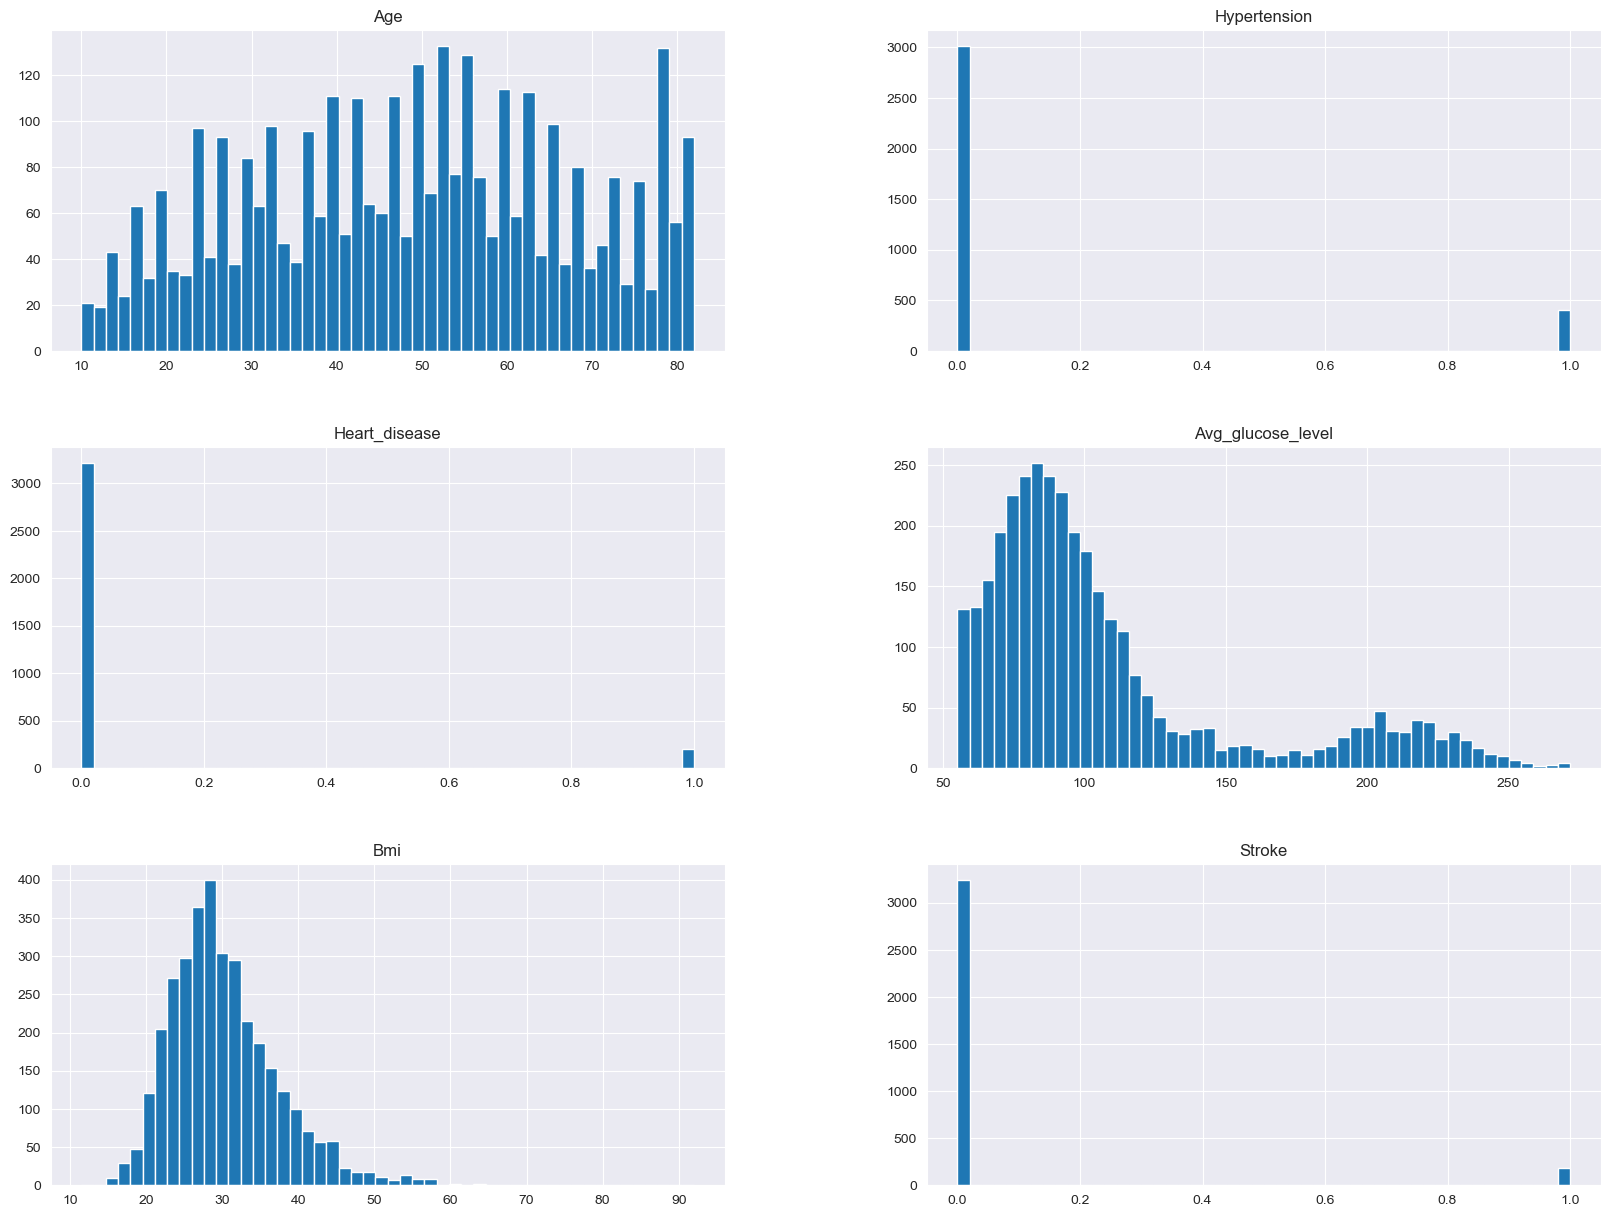

In [351]:
#visualização dos dados tratados
data.hist(bins=50, figsize=(20,15))

In [352]:
#Aplicar o One Hot Encoding à feature "Residence_type"

one_hot_encoder_residence = OneHotEncoder(cols='Residence_type', handle_unknown='return_nan', return_df=True,use_cat_names=True)


In [353]:
#Aplicar One Hot Encoding à feature "Work_type"

one_hot_encoder_work_type = OneHotEncoder(cols='Work_type', handle_unknown='return_nan', return_df=True,use_cat_names=True)


# Pipeline

In [354]:
pipeline = Pipeline([('ordinal_enc_smoking',ordinal_encoder_smoking),
                     ('ordinal_enc_gender',ordinal_encoder_gender),
                     ('ordinal_enc_married',ordinal_encoder_married),
                     ('oneHot_enc_residence',one_hot_encoder_residence),
                     ('oneHot_enc_work',one_hot_encoder_work_type),
                     ])

# apply the encoder to the dataset
data = pipeline.fit_transform(data)
data

Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                   1.0                      0.0                 0.0   
1                   1.0                      0.0                 0.0   
2                   1.0                      0.0                 0.0   
3                   0.0                      1.0                 0.0   
4                   1.0                      0.0                 0.0   
...                 ...                      ...                 ...   
3420                0.0                      1.0                 0.0   
3421                1.0                      0.0                 0.0   
3422                0.0                      1.0                 0.0   
3423                0.0                      1.0                 0.0   
3424                1.0                      0.0                 0.0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                    0.0                     0.0                   1.0   
1                    0.0                     0.0                   0.0   
2                    0.0                     0.0                   1.0   
3                    0.0                     0.0                   0.0   
4                    0.0                     0.0                   1.0   
...                  ...                     ...                   ...   
3420                 0.0                     0.0                   0.0   
3421                 0.0                     0.0                   0.0   
3422                 0.0                     0.0                   1.0   
3423                 0.0                     0.0                   0.0   
3424                 0.0                     0.0                   0.0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  Stroke  
0                      0.0             228.69  36.6               1       1  
1                      1.0             105.92  32.5               0       1  
2                      0.0             171.23  34.4               2       1  
3                      1.0             174.12  24.0               0       1  
4                      0.0             186.21  29.0               1       1  
...                    ...                ...   ...             ...     ...  
3420                   1.0              71.97  28.3               0       0  
3421                   1.0              77.93  21.7               0       0  
3422                   0.0             125.20  40.0               0       0  
3423                   1.0              82.99  30.6               0       0  
3424                   1.0             166.29  25.6               1       0  

[3425 rows x 16 columns]

In [355]:
# converter todos os valores para int
data[['Work_type_private']] = data[['Work_type_private']].astype('int')
data[['Work_type_self-employed']] = data[['Work_type_self-employed']].astype('int')
data[['Work_type_govt_job']] = data[['Work_type_govt_job']].astype('int')
data[['Work_type_children']] = data[['Work_type_children']].astype('int')
data[['Work_type_never_worked']] = data[['Work_type_never_worked']].astype('int')
data[['Residence_type_rural']] = data[['Residence_type_rural']].astype('int')
data[['Residence_type_urban']] = data[['Residence_type_urban']].astype('int')

data

Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  Stroke  
0                        0             228.69  36.6               1       1  
1                        1             105.92  32.5               0       1  
2                        0             171.23  34.4               2       1  
3                        1             174.12  24.0               0       1  
4                        0             186.21  29.0               1       1  
...                    ...                ...   ...             ...     ...  
3420                     1              71.97  28.3               0       0  
3421                     1              77.93  21.7               0       0  
3422                     0             125.20  40.0               0       0  
3423                     1              82.99  30.6               0       0  
3424                     1             166.29  25.6               1       0  

[3425 rows x 16 columns]

# Dados

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hypertension'}>],
       [<Axes: title={'center': 'Heart_disease'}>,
        <Axes: title={'center': 'Ever_married'}>,
        <Axes: title={'center': 'Avg_glucose_level'}>],
       [<Axes: title={'center': 'Bmi'}>,
        <Axes: title={'center': 'Smoking_status'}>,
        <Axes: title={'center': 'Stroke'}>]], dtype=object)

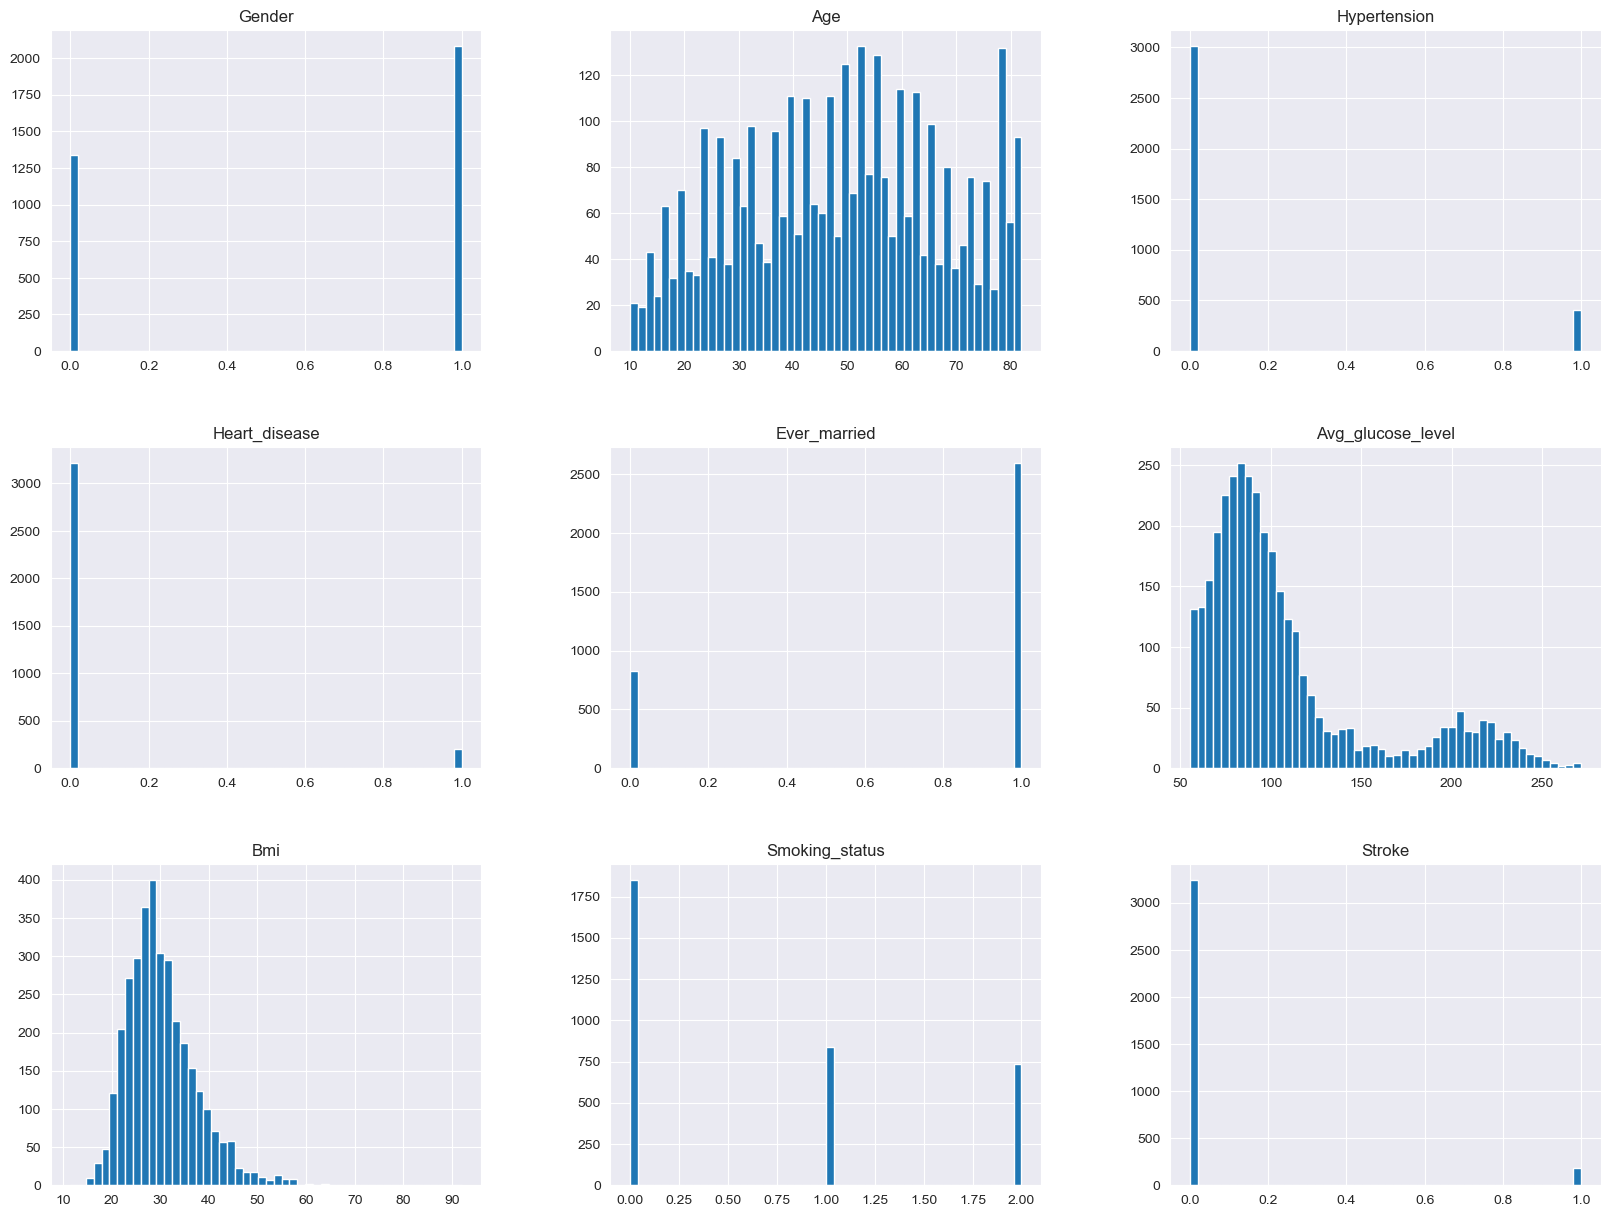

In [356]:
#visualização geral dos dados tratados
a= data
a = a.drop('Work_type_private', axis=1)
a = a.drop('Work_type_self-employed', axis=1)
a = a.drop('Work_type_govt_job', axis=1)
a = a.drop('Work_type_never_worked', axis=1)
a = a.drop('Work_type_children', axis=1)
a = a.drop('Residence_type_rural', axis=1)
a = a.drop('Residence_type_urban', axis=1)


data['Smoking_status'].value_counts()
a.hist(bins=50, figsize=(20,15))

# Meta 2

## Unsupervided Learning- Kmeans

In [357]:
#K-means

In [358]:
#remover a feature de output
data_unsuper = data
data_unsuper =data_unsuper.drop(columns='Stroke', axis='1')
data_unsuper1= data_unsuper
data_unsuper.head(5)

Gender  Age  Hypertension  Heart_disease  Ever_married  Work_type_private  \
0       0   67             0              1             1                  1   
1       0   80             0              1             1                  1   
2       1   49             0              0             1                  1   
3       1   79             1              0             1                  0   
4       0   81             0              0             1                  1   

   Work_type_self-employed  Work_type_govt_job  Work_type_children  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        1                   0                   0   
4                        0                   0                   0   

   Work_type_never_worked  Residence_type_urban  Residence_type_rural  \
0                       0                     1                     0   
1                       0                     0                     1   
2                       0                     1                     0   
3                       0                     0                     1   
4                       0                     1                     0   

   Avg_glucose_level   Bmi  Smoking_status  
0             228.69  36.6               1  
1             105.92  32.5               0  
2             171.23  34.4               2  
3             174.12  24.0               0  
4             186.21  29.0               1

In [359]:
features = list(data_unsuper.columns)
features= data_unsuper1[features]

In [360]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
#we don’t know beforehand how many clusters is optimal so we must create a plot that displays the number of clusters along with the SSE (sum of squared errors) of the model.

In [361]:
#instantiate the k-means class, using optimal number of clusters
#o nosso numero de cluster ideais pelo elbow é 4
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(data_unsuper)

#view cluster assignments for each observation
kmeans.labels_



array([1, 3, 1, ..., 2, 0, 2])

In [362]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

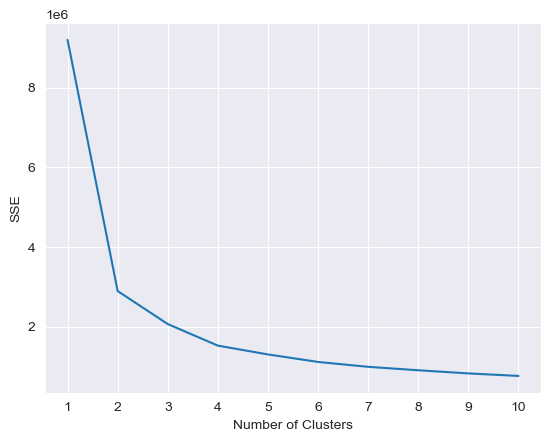

In [363]:
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [364]:
clustering_kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
data_unsuper['clusters'] = clustering_kmeans.fit_predict(data_unsuper)

In [365]:
# The lowest SSE value
kmeans.inertia_

762197.1846763662

In [366]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 6.19791667e-01,  2.40364583e+01,  1.56250000e-02,
         5.20833333e-03,  3.38541667e-01,  7.18750000e-01,
         5.20833333e-02,  9.89583333e-02,  1.04166667e-01,
         2.60416667e-02,  4.42708333e-01,  5.57291667e-01,
         1.22359062e+02,  2.76609375e+01,  4.58333333e-01,
         1.38777878e-17],
       [ 5.57768924e-01,  5.95099602e+01,  2.98804781e-01,
         1.43426295e-01,  8.80478088e-01,  5.45816733e-01,
         2.82868526e-01,  1.55378486e-01,  1.59362550e-02,
         8.67361738e-19,  5.17928287e-01,  4.82071713e-01,
         1.98129721e+02,  3.35000000e+01,  6.09561753e-01,
         1.31474104e-01],
       [ 5.04587156e-01,  6.34633028e+01,  2.52293578e-01,
         1.65137615e-01,  9.17431193e-01,  5.96330275e-01,
         2.29357798e-01,  1.74311927e-01, -6.93889390e-18,
        -8.67361738e-19,  5.00000000e-01,  5.00000000e-01,
         2.31024128e+02,  3.36376147e+01,  7.29357798e-01,
         1.46788991e-01],
       [ 6.18625277e-01,  2.48447894e

In [367]:
# The number of iterations required to converge
kmeans.n_iter_

17

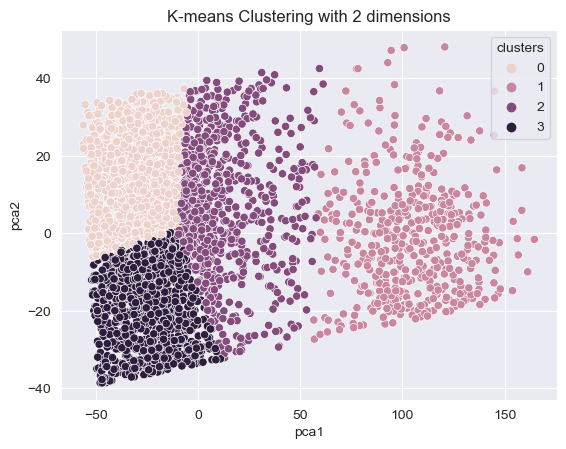

In [368]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_unsuper)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_unsuper['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## Unsupervided Learning- Optics, DBSCAN

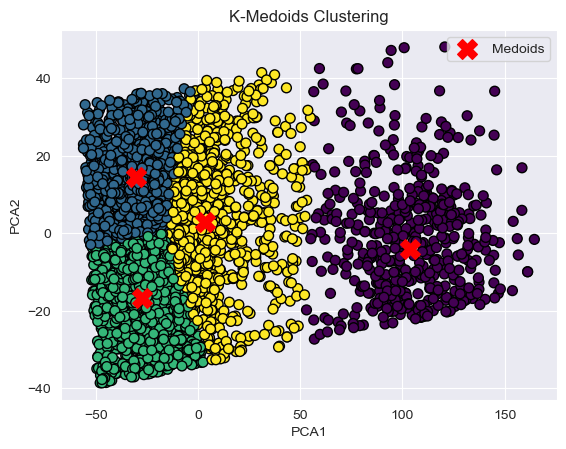

In [369]:

kmedoids = KMedoids(n_clusters=4, random_state=42)
labels = kmedoids.fit_predict(results)


plt.scatter(results["pca1"], results["pca2"], c=labels, cmap='viridis', s=50, edgecolors='k')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

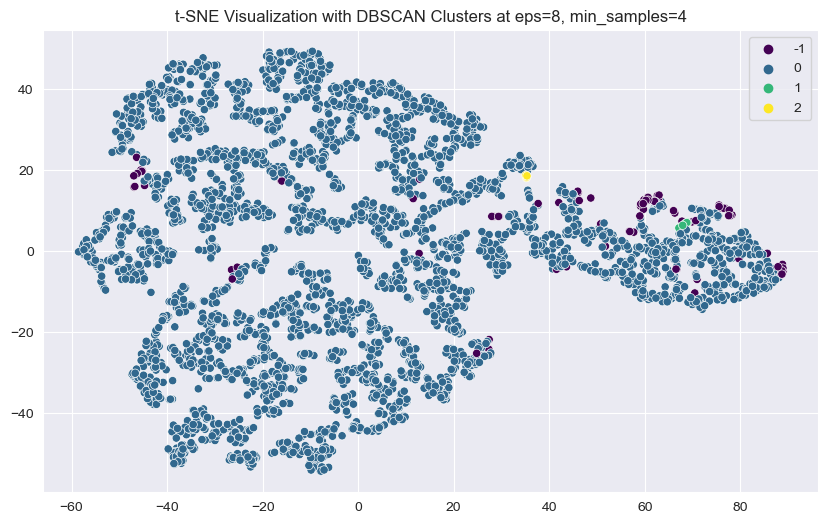

In [370]:
# Applying DBSCAN, testado com vários eps melhor resultado 8
dbscan = DBSCAN(eps=8, min_samples=4)
labels = dbscan.fit_predict(data_unsuper1)

# Converting the dataset to a Pandas DataFrame
df = pd.DataFrame(data_unsuper1, columns=[f'Feature {i}' for i in range(1, 16)])
df['Cluster'] = labels  # Adding cluster labels to the DataFrame


# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_unsuper1)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('t-SNE Visualization with DBSCAN Clusters at eps=8, min_samples=4')
plt.show()

In [371]:
#optics
optics = OPTICS(min_samples=4, xi=0.05, min_cluster_size=0.05)
optics.fit(data_unsuper1)
labels = optics.labels_

#clustering = OPTICS(min_samples=2).fit(data_unsuper1)
#clustering.labels_
#labels = optics.labels_
print(labels)

[0 0 0 ... 0 0 0]


Text(0.5, 1.0, 'OPTICS Clustering Results')

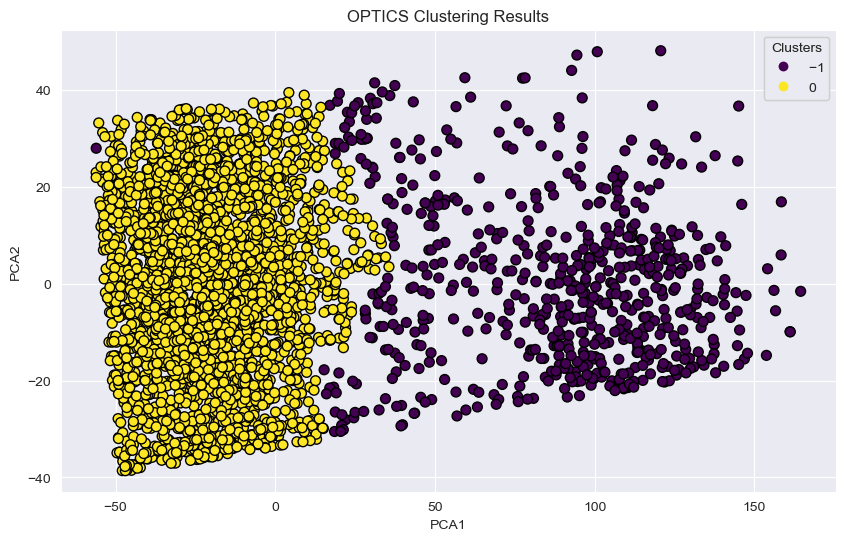

In [372]:
#optics with pca
optics = OPTICS(min_samples=4, xi=0.05, min_cluster_size=0.05)
optics.fit(results)
labels = optics.labels_
# Visualizing the clustering results
plt.figure(figsize=(10, 6))

# Scatter plot of data points with colors based on cluster labels
scatter = plt.scatter(results["pca1"], results["pca2"], c=labels, cmap='viridis', s=50, edgecolors='k')

# Adding legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('OPTICS Clustering Results')


In [373]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics.reachability_,
                                   core_distances = optics.core_distances_,
                                   ordering = optics.ordering_, eps = 0.5)
 
# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics.reachability_,
                                   core_distances = optics.core_distances_,
                                   ordering = optics.ordering_, eps = 2)
 
# Producing the labels according to the DBSCAN technique with eps = 0.20
labels3 = cluster_optics_dbscan(reachability = optics.reachability_,
                                   core_distances = optics.core_distances_,
                                   ordering = optics.ordering_, eps = 0.3)
 
# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(results))
 
# Storing the reachability distance of each point
reachability = optics.reachability_[optics.ordering_]
 
# Storing the cluster labels of each point
labels = optics.labels_[optics.ordering_]
 
print(labels)


[-1 -1 -1 ... -1 -1 -1]


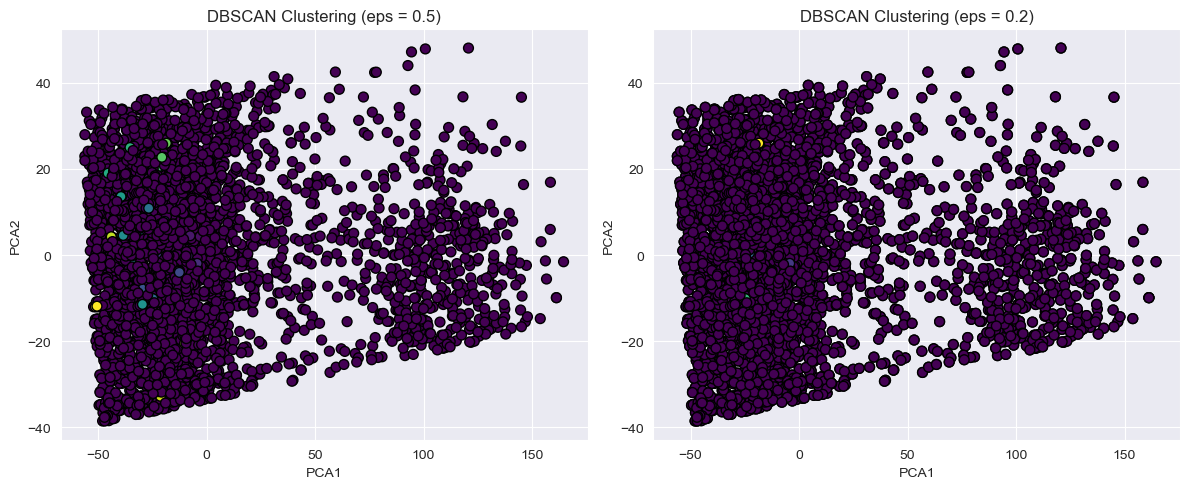

In [374]:
# Visualizing the clusters in two dimensions
plt.figure(figsize=(12, 5))

# Scatter plot for eps = 0.5
plt.subplot(1, 2, 1)
plt.scatter(results['pca1'], results['pca2'], c=labels1, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering (eps = 0.5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Scatter plot for eps = 2.0
plt.subplot(1, 2, 2)
plt.scatter(results['pca1'], results['pca2'], c=labels2, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering (eps = 2.0)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
# Scatter plot for eps = 0.2
plt.subplot(1, 2, 2)
plt.scatter(results['pca1'], results['pca2'], c=labels3, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering (eps = 0.2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

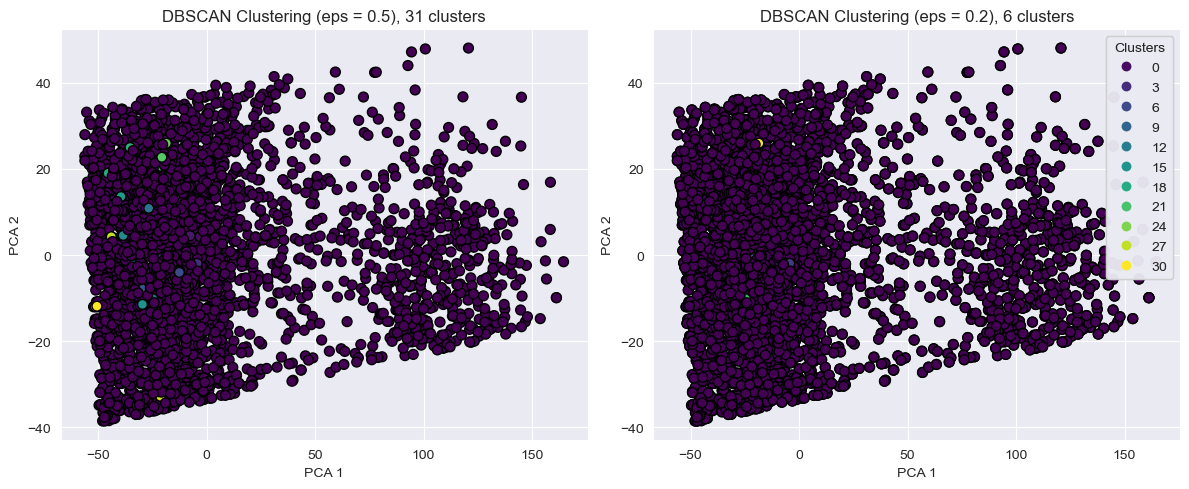

In [375]:
# Counting clusters, excluding outliers (-1 label)
unique_labels1, counts1 = np.unique(labels1[labels1 != -1], return_counts=True)
unique_labels2, counts2 = np.unique(labels2[labels2 != -1], return_counts=True)
unique_labels3, counts3 = np.unique(labels3[labels3 != -1], return_counts=True)
# Visualizing the clusters in two dimensions
plt.figure(figsize=(12, 5))

# Scatter plot for eps = 0.5
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(results['pca1'], results['pca2'], c=labels1, cmap='viridis', s=50, edgecolors='k')
plt.title(f'DBSCAN Clustering (eps = 0.5), {len(unique_labels1)} clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


# Scatter plot for eps = 2.0
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(results['pca1'], results['pca2'], c=labels2, cmap='viridis', s=50, edgecolors='k')
plt.title(f'DBSCAN Clustering (eps = 2.0), {len(unique_labels2)} clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Scatter plot for eps = 0.2
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(results['pca1'], results['pca2'], c=labels3, cmap='viridis', s=50, edgecolors='k')
plt.title(f'DBSCAN Clustering (eps = 0.2), {len(unique_labels3)} clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


# Adding legend
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

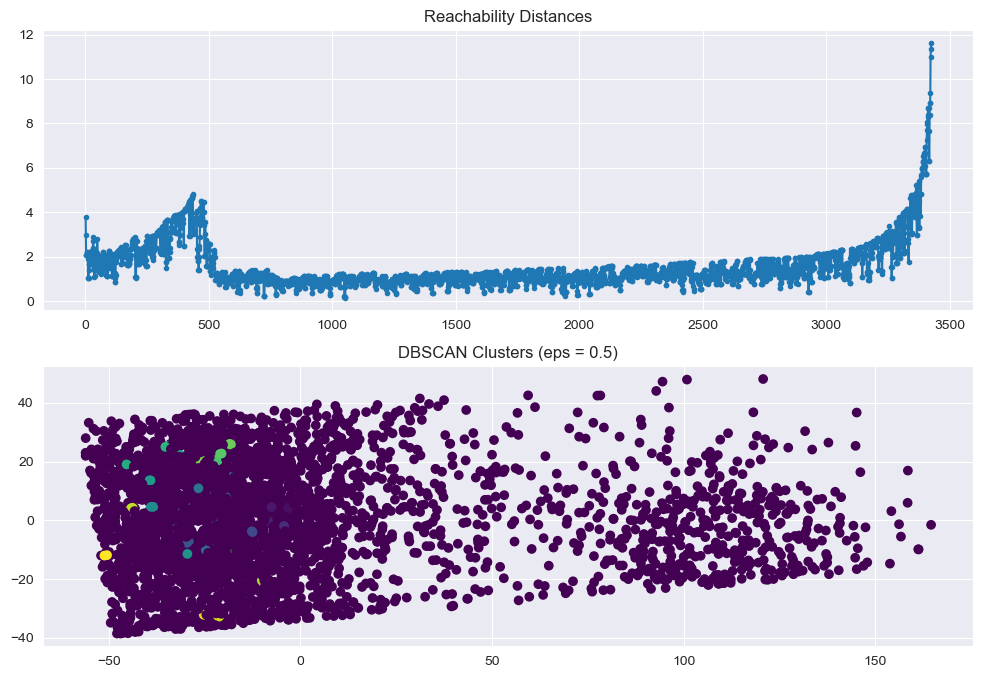

In [376]:
# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(optics.ordering_))

# Storing the reachability distance of each point
reachability = optics.reachability_[optics.ordering_]

# Storing the cluster labels of each point
labels = optics.labels_[optics.ordering_]

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot the reachability distances
plt.subplot(2, 1, 1)
plt.plot(space, reachability, marker='.')
plt.title('Reachability Distances')

# Plot the DBSCAN clusters with eps = 0.5
plt.subplot(2, 1, 2)
plt.scatter(results['pca1'], results['pca2'], c=labels1, cmap='viridis', marker='o')
plt.title('DBSCAN Clusters (eps = 0.5)')


plt.show()

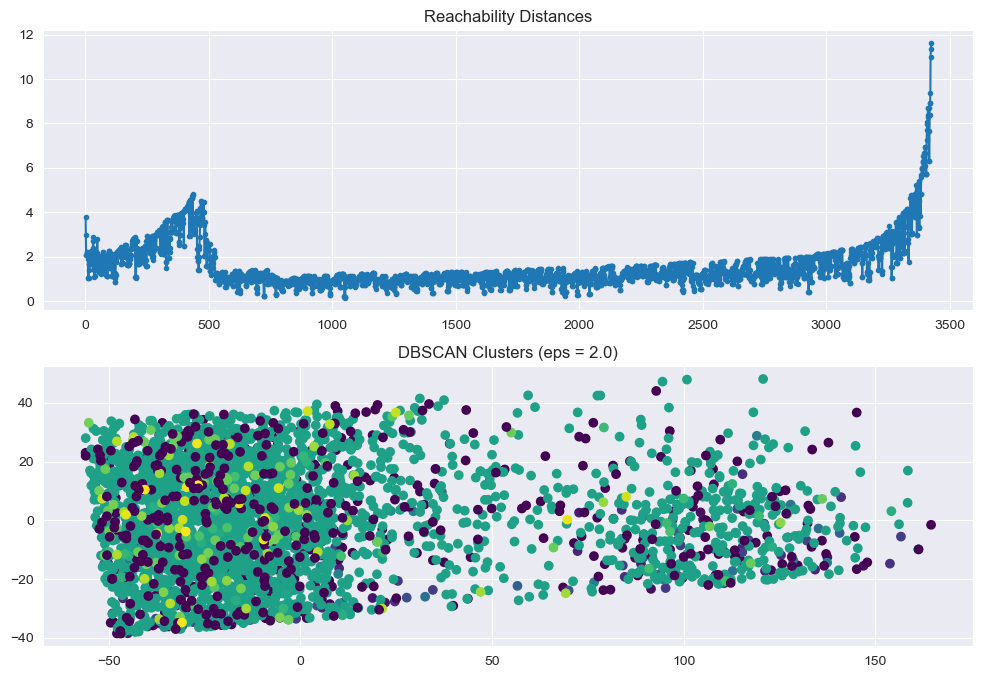

In [377]:

# Visualize the clusters
plt.figure(figsize=(12, 8))
labels_eps_2 = labels2[optics.ordering_]
# Plot the reachability distances
plt.subplot(2, 1, 1)
plt.plot(space, reachability, marker='.')
plt.title('Reachability Distances')

# Plot the DBSCAN clusters with eps = 2.0
plt.subplot(2, 1, 2)
plt.scatter(results['pca1'], results['pca2'], c=labels_eps_2, cmap='viridis', marker='o')
plt.title('DBSCAN Clusters (eps = 2.0)')

plt.show()

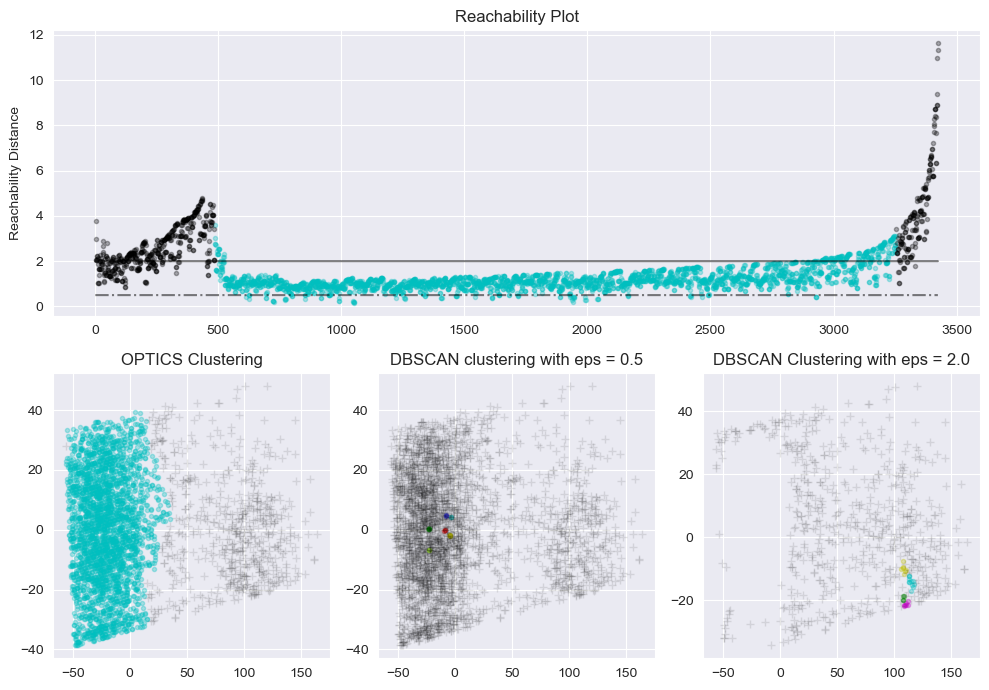

In [378]:
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])
 
# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
 
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = results[optics.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
     
ax2.plot(results.iloc[optics.labels_ == -1, 0],
        results.iloc[optics.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
 
# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = results[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
       
ax3.plot(results.iloc[labels1 == -1, 0],
        results.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')
 
# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = results.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
         
ax4.plot(results.iloc[labels2 == -1, 0],
        results.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')
 
 
plt.tight_layout()
plt.show()


In [379]:
#pca_clusters_data = pd.merge(data_unsuper, results, how='outer', on='Distance_Between')
pca_clusters_data = pd.concat([data_unsuper, results["pca1"]], axis=1)
pca_clusters_data = pd.concat([pca_clusters_data, results["pca2"]], axis=1)
pca_clusters_data = pd.concat([pca_clusters_data, data["Stroke"]], axis=1)
data_unsuper = pd.concat([data_unsuper, data["Stroke"]], axis=1)

data_unsuper.head(5)


Gender  Age  Hypertension  Heart_disease  Ever_married  Work_type_private  \
0       0   67             0              1             1                  1   
1       0   80             0              1             1                  1   
2       1   49             0              0             1                  1   
3       1   79             1              0             1                  0   
4       0   81             0              0             1                  1   

   Work_type_self-employed  Work_type_govt_job  Work_type_children  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        1                   0                   0   
4                        0                   0                   0   

   Work_type_never_worked  Residence_type_urban  Residence_type_rural  \
0                       0                     1                     0   
1                       0                     0                     1   
2                       0                     1                     0   
3                       0                     0                     1   
4                       0                     1                     0   

   Avg_glucose_level   Bmi  Smoking_status  clusters  Stroke  
0             228.69  36.6               1         1       1  
1             105.92  32.5               0         3       1  
2             171.23  34.4               2         1       1  
3             174.12  24.0               0         1       1  
4             186.21  29.0               1         1       1

In [446]:
data_unsuper

Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  clusters  \
0                        0             228.69  36.6               1         1   
1                        1             105.92  32.5               0         3   
2                        0             171.23  34.4               2         1   
3                        1             174.12  24.0               0         1   
4                        0             186.21  29.0               1         1   
...                    ...                ...   ...             ...       ...   
3420                     1              71.97  28.3               0         3   
3421                     1              77.93  21.7               0         3   
3422                     0             125.20  40.0               0         2   
3423                     1              82.99  30.6               0         0   
3424                     1             166.29  25.6               1         2   

      Stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
3420       0  
3421       0  
3422       0  
3423       0  
3424       0  

[3425 rows x 17 columns]

In [381]:
#disponiblização dos datasets com clusters
data #dataset original
data_unsuper #dataset com clusters kmeans
pca_clusters_data #dataset com clusters kmeans e duas features Principal Component Analysis


Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  clusters  \
0                        0             228.69  36.6               1         1   
1                        1             105.92  32.5               0         3   
2                        0             171.23  34.4               2         1   
3                        1             174.12  24.0               0         1   
4                        0             186.21  29.0               1         1   
...                    ...                ...   ...             ...       ...   
3420                     1              71.97  28.3               0         3   
3421                     1              77.93  21.7               0         3   
3422                     0             125.20  40.0               0         2   
3423                     1              82.99  30.6               0         0   
3424                     1             166.29  25.6               1         2   

            pca1       pca2  Stroke  
0     121.773750  -5.311622       1  
1       1.051872 -31.488205       1  
2      62.671950   6.396240       1  
3      68.520218 -22.904196       1  
4      80.873036 -23.662252       1  
...          ...        ...     ...  
3420  -32.576876 -37.077580       0  
3421  -29.510736 -11.479323       0  
3422   20.506842 -30.495878       0  
3423  -26.626727  10.874817       0  
3424   57.760420   3.991276       0  

[3425 rows x 19 columns]

# Supervised Learning

## Before balance dataset

In [382]:
# Supervised Learning
x = data.iloc[:,0:15]
y = data["Stroke"]

In [383]:
x

Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  
0                        0             228.69  36.6               1  
1                        1             105.92  32.5               0  
2                        0             171.23  34.4               2  
3                        1             174.12  24.0               0  
4                        0             186.21  29.0               1  
...                    ...                ...   ...             ...  
3420                     1              71.97  28.3               0  
3421                     1              77.93  21.7               0  
3422                     0             125.20  40.0               0  
3423                     1              82.99  30.6               0  
3424                     1             166.29  25.6               1  

[3425 rows x 15 columns]

In [384]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: Stroke, Length: 3425, dtype: int64

In [385]:
y
y.value_counts()

Stroke
0    3245
1     180
Name: count, dtype: int64

In [386]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 50

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 
    lr_pipeline = Pipeline([('std_scaler',StandardScaler()),
                      ('linear_svm', LogisticRegression())
                     ])
    lr_pipeline.fit(x_train,y_train)
    logistic_regression_pred = lr_pipeline.predict(x_test)
    accuracy_counter += accuracy_score(y_test, logistic_regression_pred)
    precision_counter += precision_score(y_test, logistic_regression_pred)
    recall_counter += recall_score(y_test, logistic_regression_pred)
    f1_counter += f1_score(y_test, logistic_regression_pred)
    
print("Conclusions:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: Un

Conclusions:
Accuracy:  0.95
Precision:  0.27
Recall:  0.01
F1-score:  0.02


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: Un

In [387]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

lr_pipeline = Pipeline([('std_scaler',StandardScaler()),
                      ('linear_svm', LogisticRegression())
                     ])

In [388]:
lr_pipeline.fit(x_train,y_train)
scores = cross_val_score(lr_pipeline,x_test,y_test,cv=5)
scores.mean()

0.9474452554744526

In [389]:
logistic_regression_pred = lr_pipeline.predict(x_test)

In [390]:
print(classification_report(y_test,logistic_regression_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       651
           1       0.00      0.00      0.00        34

    accuracy                           0.95       685
   macro avg       0.48      0.50      0.49       685
weighted avg       0.90      0.95      0.93       685


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


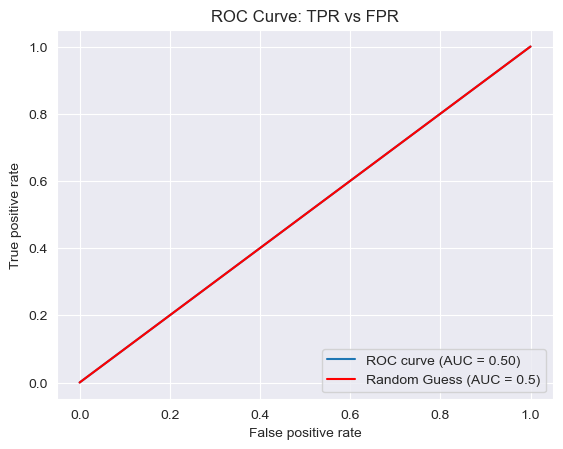

In [391]:
fpr,tpr,threshold = roc_curve(y_test,logistic_regression_pred)

auc_score = roc_auc_score(y_test,logistic_regression_pred)


def plot_roc_curve(FPR,TPR, score):
    
    plt.figure()
    plt.plot(FPR,TPR, label='ROC curve (AUC = %0.2f)' % score)
    plt.plot([0, 1], [0, 1], color='red', label='Random Guess (AUC = 0.5)')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve: TPR vs FPR")
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(fpr,tpr, auc_score)

# Penalized-SVM

In [474]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 30

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
    svc_model = svm.SVC(class_weight='balanced', probability=True)
    svc_model.fit(x_train,y_train)
    svc_model_pred = svc_model.predict(x_test)
    accuracy_counter += accuracy_score(y_test, svc_model_pred)
    precision_counter += precision_score(y_test, svc_model_pred)
    recall_counter += recall_score(y_test, svc_model_pred)
    f1_counter += f1_score(y_test, svc_model_pred)
    
print("Conclusions:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

Conclusions:
Accuracy:  0.72
Precision:  0.13
Recall:  0.78
F1-score:  0.22


## Balance Dataset

In [392]:
from collections import Counter
print('Current dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

Current dataset shape Counter({0: 3245, 1: 180})
Resampled dataset shape Counter({0: 180, 1: 180})


## Logisitic Regression

In [393]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 30

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2)
    lr_pipeline = Pipeline([('std_scaler',StandardScaler()),
                  ('log_reg', LogisticRegression())
                 ])
    lr_pipeline.fit(x_train,y_train)
    logistic_regression_pred = lr_pipeline.predict(x_test)
    accuracy_counter += accuracy_score(y_test, logistic_regression_pred)
    precision_counter += precision_score(y_test, logistic_regression_pred)
    recall_counter += recall_score(y_test, logistic_regression_pred)
    f1_counter += f1_score(y_test, logistic_regression_pred)
    
print("Conclusions:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

Conclusions:
Accuracy:  0.73
Precision:  0.72
Recall:  0.76
F1-score:  0.74


In [394]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2)

In [395]:
lr_pipeline = Pipeline([('std_scaler',StandardScaler()),
              ('log_reg', LogisticRegression())
             ])
lr_pipeline.fit(x_train,y_train)

svm_Pipeline(steps=[('std_scaler', StandardScaler()),
                    ('log_reg', LogisticRegression())])

In [396]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr_pipeline, x_res, y_res, cv=kfold)

# Imprimindo a média e desvio padrão dos scores
print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Media dos scores: 0.7305555555555555
Desvio padrão dos scores: 0.058663089116507985


In [397]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr_pipeline, x_res, y_res, cv=kfold)

# Imprimindo a média e desvio padrão dos scores
print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Media dos scores: 0.7333333333333334
Desvio padrão dos scores: 0.0806991058129664


In [398]:
y_pred_log_reg = lr_pipeline.predict(x_test)

In [399]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix

array([[19, 15],
       [ 6, 32]], dtype=int64)

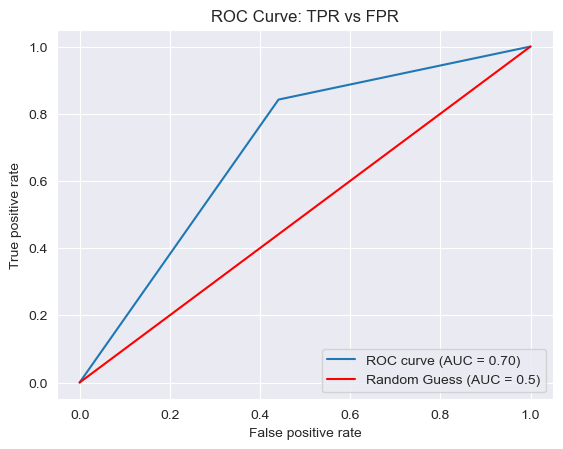

In [400]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_log_reg)

auc_score = roc_auc_score(y_test,y_pred_log_reg)

plot_roc_curve(fpr,tpr, auc_score)

## SVM - Standard Scaling

In [401]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 30

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2)
    svm_pipeline = Pipeline([('standard_scaler', StandardScaler()),
                         ('linear_svm',svm.LinearSVC(C=1.0, loss='hinge'))
                         ])
    svm_pipeline.fit(x_train,y_train)
    svm_pred = svm_pipeline.predict(x_test)
    accuracy_counter += accuracy_score(y_test, svm_pred)
    precision_counter += precision_score(y_test, svm_pred)
    recall_counter += recall_score(y_test, svm_pred)
    f1_counter += f1_score(y_test, svm_pred)
    
print("Conclusions:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Li

Conclusions:
Accuracy:  0.71
Precision:  0.68
Recall:  0.77
F1-score:  0.72


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [402]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)

In [403]:
svm_pipeline = Pipeline([('standard_scaler', StandardScaler()),
                         ('linear_svm',svm.LinearSVC(C=1.0, loss='hinge'))
                         ])

In [404]:
svm_pipeline.fit(x_train,y_train)

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


svm_Pipeline(steps=[('standard_scaler', StandardScaler()),
                    ('linear_svm', LinearSVC(loss='hinge'))])

In [405]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_pipeline, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Media dos scores: 0.7138888888888889
Desvio padrão dos scores: 0.06608542918539065


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [406]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm_pipeline, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Li

Media dos scores: 0.725
Desvio padrão dos scores: 0.09658521472618728


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [407]:
svm_pred = svm_pipeline.predict(x_test)

In [408]:
conf_matrix = confusion_matrix(y_test, svm_pred)
conf_matrix

array([[20, 17],
       [ 7, 28]], dtype=int64)

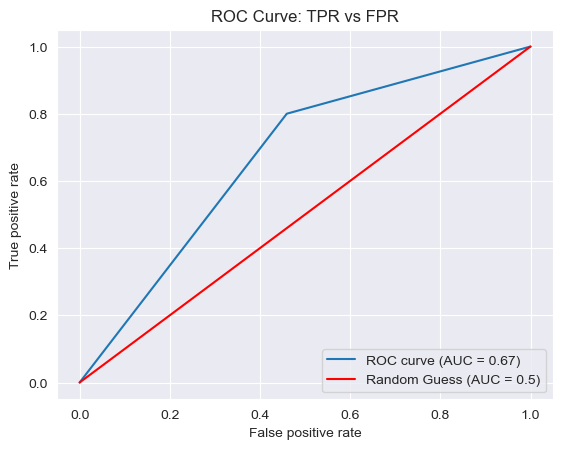

In [409]:
fpr, tpr, threshold = roc_curve(y_test, svm_pred)
auc_score = roc_auc_score(y_test, svm_pred)

plot_roc_curve(fpr, tpr, auc_score)

## SVM - MinMaxScaler

In [410]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 30

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2)
    svm_pipeline = Pipeline([('minmax_scaler', MinMaxScaler()),
                         ('linear_svm',svm.LinearSVC(C=1.0, loss='hinge'))
                         ])
    svm_pipeline.fit(x_train,y_train)
    svm_pred = svm_pipeline.predict(x_test)
    accuracy_counter += accuracy_score(y_test, svm_pred)
    precision_counter += precision_score(y_test, svm_pred)
    recall_counter += recall_score(y_test, svm_pred)
    f1_counter += f1_score(y_test, svm_pred)
    
print("Conclusions:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Li

Conclusions:
Accuracy:  0.72
Precision:  0.71
Recall:  0.78
F1-score:  0.74


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [411]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)


In [412]:
svm_pipeline = Pipeline([('minmax_scaler', MinMaxScaler()),
                         ('linear_svm', svm.LinearSVC(C=1.0, loss='hinge'))
                         ])


In [413]:
svm_pipeline.fit(x_train, y_train)

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


svm_Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                    ('linear_svm', LinearSVC(loss='hinge'))])

In [414]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_pipeline, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Media dos scores: 0.711111111111111
Desvio padrão dos scores: 0.07777777777777778


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [415]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm_pipeline, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Media dos scores: 0.7083333333333334
Desvio padrão dos scores: 0.1011126373511183


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [416]:
svm_pred = svm_pipeline.predict(x_test)

In [417]:
conf_matrix = confusion_matrix(y_test, svm_pred)
conf_matrix

array([[27, 15],
       [ 6, 24]], dtype=int64)

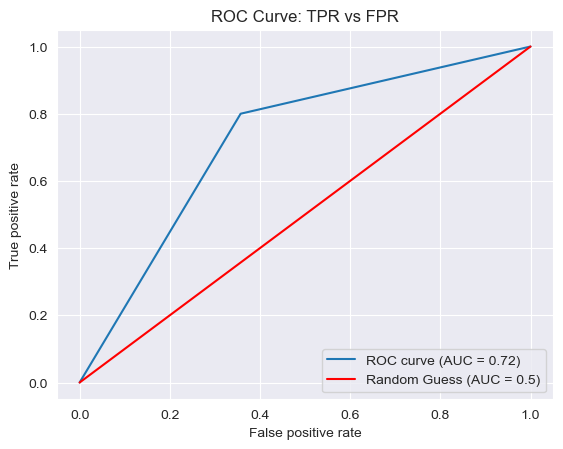

In [418]:
fpr, tpr, threshold = roc_curve(y_test, svm_pred)
auc_score = roc_auc_score(y_test, svm_pred)

plot_roc_curve(fpr, tpr, auc_score)

## Random Forest

In [419]:
accuracy_counter = 0.0
precision_counter = 0.0
recall_counter = 0.0
f1_counter = 0.0
iterations = 30

for i in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)
    randomForest = RandomForestClassifier()
    randomForest.fit(x_train, y_train)
    rf_pred = randomForest.predict(x_test)
    accuracy_counter += accuracy_score(y_test, rf_pred)
    precision_counter += precision_score(y_test, rf_pred)
    recall_counter += recall_score(y_test, rf_pred)
    f1_counter += f1_score(y_test, rf_pred)

print("Conclusions for Random Forest:")
print("Accuracy: ", (accuracy_counter / iterations).__round__(2))
print("Precision: ", (precision_counter / iterations).__round__(2))
print("Recall: ", (recall_counter / iterations).__round__(2))
print("F1-score: ", (f1_counter / iterations).__round__(2))

Conclusions for Random Forest:
Accuracy:  0.68
Precision:  0.67
Recall:  0.71
F1-score:  0.69


In [420]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)

In [421]:
randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)

RandomForestClassifier()

In [422]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(randomForest, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Media dos scores: 0.7194444444444443
Desvio padrão dos scores: 0.02545875386086577


In [423]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm_pipeline, x_res, y_res, cv=kfold)

print("Media dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Media dos scores: 0.7083333333333334
Desvio padrão dos scores: 0.1011126373511183


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [424]:
rf_pred = randomForest.predict(x_test)

In [425]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.72
Precision: 0.74
Recall: 0.78
F1-score: 0.76


In [426]:
conf_matrix = confusion_matrix(y_test, rf_pred)
print(conf_matrix)

[[20 11]
 [ 9 32]]


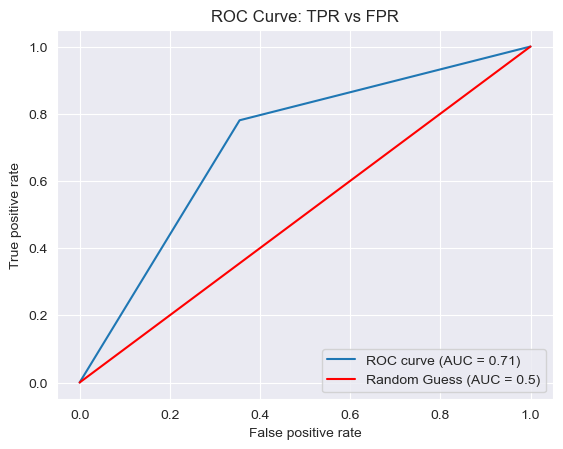

In [427]:
fpr, tpr, threshold = roc_curve(y_test, rf_pred)
auc_score = roc_auc_score(y_test, rf_pred)

plot_roc_curve(fpr, tpr, auc_score)

## Random Forest - best params

In [428]:
n_estimators = [int(x) for x in np.linspace(10,100,4)]
max_features = ['log2','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [429]:
param_grid = {
    "n_estimators": n_estimators,
    "max_features" : max_features,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "bootstrap" : bootstrap
}

In [430]:
rf_grid = GridSearchCV(randomForest,param_grid,cv=5)

In [431]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 40, 70, 100]})

In [432]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [433]:
rf_grid_pred = rf_grid.predict(x_test)

In [434]:
accuracy = accuracy_score(y_test, rf_grid_pred)
precision = precision_score(y_test, rf_grid_pred)
recall = recall_score(y_test, rf_grid_pred)
f1 = f1_score(y_test, rf_grid_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.72
Precision: 0.76
Recall: 0.76
F1-score: 0.76


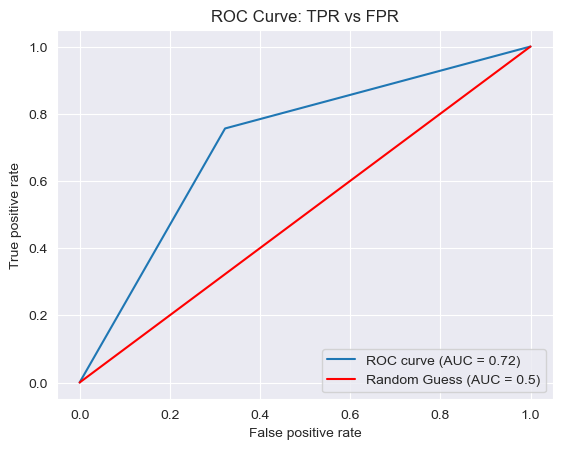

In [435]:
fpr, tpr, threshold = roc_curve(y_test, rf_grid_pred)
auc_score = roc_auc_score(y_test, rf_grid_pred)

plot_roc_curve(fpr, tpr, auc_score)

# Resultados

In [479]:
lr_pipeline = Pipeline([('std_scaler',StandardScaler()),
              ('log_reg', LogisticRegression())
             ])


svm_pipeline = Pipeline([('minMax_scaler', MinMaxScaler()),
                     ('linear_svm',svm.LinearSVC(C=1.0, loss='hinge'))
                     ])

randomForest = RandomForestClassifier()

In [480]:
voting_clf = VotingClassifier(estimators=[('lr',lr_pipeline),('svm',svm_pipeline),('rndForest',randomForest)], voting='hard')

## Balance datasets from unsupervised learning

In [450]:
x_data_unsuper = data_unsuper.iloc[:,0:16]
y_data_unsuper = data_unsuper["Stroke"]
x_data_unsuper


Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  clusters  
0                        0             228.69  36.6               1         1  
1                        1             105.92  32.5               0         3  
2                        0             171.23  34.4               2         1  
3                        1             174.12  24.0               0         1  
4                        0             186.21  29.0               1         1  
...                    ...                ...   ...             ...       ...  
3420                     1              71.97  28.3               0         3  
3421                     1              77.93  21.7               0         3  
3422                     0             125.20  40.0               0         2  
3423                     1              82.99  30.6               0         0  
3424                     1             166.29  25.6               1         2  

[3425 rows x 16 columns]

In [451]:
y_data_unsuper

0       1
1       1
2       1
3       1
4       1
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: Stroke, Length: 3425, dtype: int64

In [452]:
from collections import Counter
print('Current dataset shape %s' % Counter(y_data_unsuper))
rus = RandomUnderSampler(random_state=42)
x_data_unsuper, y_data_unsuper = rus.fit_resample(x_data_unsuper,y_data_unsuper)
print('Resampled dataset shape %s' % Counter(y_data_unsuper))

Current dataset shape Counter({0: 3245, 1: 180})
Resampled dataset shape Counter({0: 180, 1: 180})


In [453]:
x_pca_clusters_data = pca_clusters_data.iloc[:, 0:18]
y_pca_clusters_data = pca_clusters_data["Stroke"]

In [454]:
x_pca_clusters_data

Gender  Age  Hypertension  Heart_disease  Ever_married  \
0          0   67             0              1             1   
1          0   80             0              1             1   
2          1   49             0              0             1   
3          1   79             1              0             1   
4          0   81             0              0             1   
...      ...  ...           ...            ...           ...   
3420       0   82             1              0             1   
3421       1   57             0              0             1   
3422       1   81             0              0             1   
3423       1   35             0              0             1   
3424       0   51             0              0             1   

      Work_type_private  Work_type_self-employed  Work_type_govt_job  \
0                     1                        0                   0   
1                     1                        0                   0   
2                     1                        0                   0   
3                     0                        1                   0   
4                     1                        0                   0   
...                 ...                      ...                 ...   
3420                  0                        1                   0   
3421                  1                        0                   0   
3422                  0                        1                   0   
3423                  0                        1                   0   
3424                  1                        0                   0   

      Work_type_children  Work_type_never_worked  Residence_type_urban  \
0                      0                       0                     1   
1                      0                       0                     0   
2                      0                       0                     1   
3                      0                       0                     0   
4                      0                       0                     1   
...                  ...                     ...                   ...   
3420                   0                       0                     0   
3421                   0                       0                     0   
3422                   0                       0                     1   
3423                   0                       0                     0   
3424                   0                       0                     0   

      Residence_type_rural  Avg_glucose_level   Bmi  Smoking_status  clusters  \
0                        0             228.69  36.6               1         1   
1                        1             105.92  32.5               0         3   
2                        0             171.23  34.4               2         1   
3                        1             174.12  24.0               0         1   
4                        0             186.21  29.0               1         1   
...                    ...                ...   ...             ...       ...   
3420                     1              71.97  28.3               0         3   
3421                     1              77.93  21.7               0         3   
3422                     0             125.20  40.0               0         2   
3423                     1              82.99  30.6               0         0   
3424                     1             166.29  25.6               1         2   

            pca1       pca2  
0     121.773750  -5.311622  
1       1.051872 -31.488205  
2      62.671950   6.396240  
3      68.520218 -22.904196  
4      80.873036 -23.662252  
...          ...        ...  
3420  -32.576876 -37.077580  
3421  -29.510736 -11.479323  
3422   20.506842 -30.495878  
3423  -26.626727  10.874817  
3424   57.760420   3.991276  

[3425 rows x 18 columns]

In [456]:
y_pca_clusters_data

0       1
1       1
2       1
3       1
4       1
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: Stroke, Length: 3425, dtype: int64

In [457]:
print('Current dataset shape %s' % Counter(y_pca_clusters_data))
rus = RandomUnderSampler(random_state=42)
x_pca_clusters_data, y_pca_clusters_data = rus.fit_resample(x_pca_clusters_data, y_pca_clusters_data)
print('Resampled dataset shape %s' % Counter(y_pca_clusters_data))

Current dataset shape Counter({0: 3245, 1: 180})
Resampled dataset shape Counter({0: 180, 1: 180})


## Original dataset

In [481]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)

In [482]:
for clf in (lr_pipeline,svm_pipeline,randomForest,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('')
    print(clf.__class__.__name__)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


svm_Pipeline
Accuracy: 0.71
Precision: 0.62
Recall: 0.84
F1-score: 0.71

svm_Pipeline
Accuracy: 0.68
Precision: 0.60
Recall: 0.81
F1-score: 0.68


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



RandomForestClassifier
Accuracy: 0.65
Precision: 0.57
Recall: 0.77
F1-score: 0.66


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



VotingClassifier
Accuracy: 0.71
Precision: 0.62
Recall: 0.84
F1-score: 0.71


## dataset com cluster kmeans

In [483]:
x_train, x_test, y_train, y_test = train_test_split(x_data_unsuper, y_data_unsuper, test_size=0.2)

In [484]:
for clf in (lr_pipeline, svm_pipeline, randomForest, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('')
    print(clf.__class__.__name__)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


svm_Pipeline
Accuracy: 0.64
Precision: 0.61
Recall: 0.68
F1-score: 0.64

svm_Pipeline
Accuracy: 0.65
Precision: 0.62
Recall: 0.71
F1-score: 0.66


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



RandomForestClassifier
Accuracy: 0.64
Precision: 0.60
Recall: 0.71
F1-score: 0.65


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



VotingClassifier
Accuracy: 0.64
Precision: 0.61
Recall: 0.68
F1-score: 0.64


## dataset com clusters kmeans e duas features Principal Component Analysis

In [468]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_clusters_data, y_pca_clusters_data, test_size=0.2)

In [469]:
for clf in (lr_pipeline, svm_pipeline, randomForest, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('')
    print(clf.__class__.__name__)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


svm_Pipeline
Accuracy: 0.72
Precision: 0.71
Recall: 0.71
F1-score: 0.71

svm_Pipeline
Accuracy: 0.75
Precision: 0.76
Recall: 0.71
F1-score: 0.74


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



RandomForestClassifier
Accuracy: 0.68
Precision: 0.68
Recall: 0.66
F1-score: 0.67


C:\Users\rodri\anaconda3\envs\TP\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



VotingClassifier
Accuracy: 0.72
Precision: 0.71
Recall: 0.71
F1-score: 0.71
